# Generate timeseries and cases for portfolio optimization

In [1]:
#from openquantumcomputing import QAOAPortfolioOptimization, QAOABase
#from openquantumcomputing import Statistic
import asset_loader

#from qiskit import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from qiskit.visualization import *
from tqdm import tqdm
import itertools


from importlib import reload

We generate datasets through the `RandomDataProvider` in `qiskit_finance`, and generate timeseries for 100 days for a different sizes of sets of assets. 
The selection criteria is that we only want assets that do not crash, meaning that their timeseries reach 0 and stays there.

In the following, we store the seeds for 100 valid sets of assets with $N  = 2, ..., 20$.

c:\Users\havardh\playground-win\quantumComputing\optimization\PortfolioOptimization\asset_loader.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=-30)


(12, 101)
[22.6123522  83.56846026 20.71079507 37.69119479 67.57089469 17.74460264
 83.59385007 33.00269779 78.81371367  0.         43.60974642 95.46294669]
(array([9], dtype=int64),)
1
[9]
[22.6123522  83.56846026 20.71079507 37.69119479 67.57089469 17.74460264
 83.59385007 33.00269779 78.81371367]


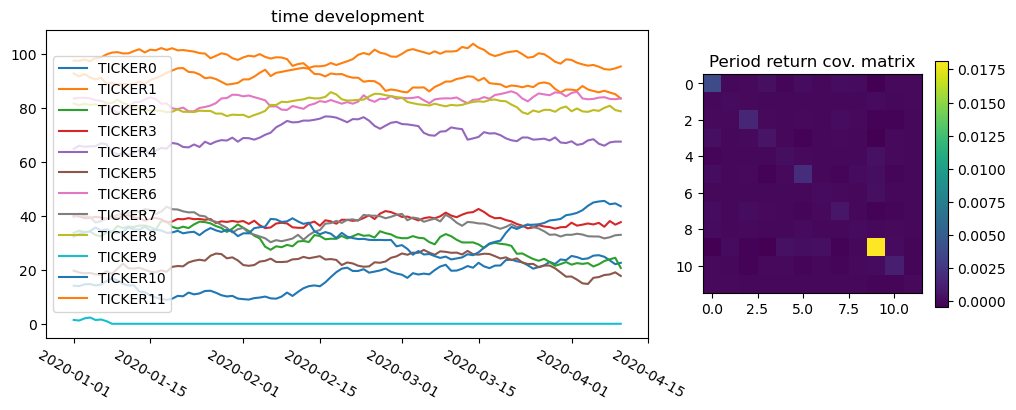

In [2]:
reload(asset_loader)
assets = asset_loader.AssetData(12, seed=0)
assets.plotAssets()


np_data = np.array(assets.fin_data._data)
print(np_data.shape)
print(np_data[:,-1])
invalid_indices = np.where(np_data[:, -1] == 0)
print(invalid_indices)
print(len(invalid_indices[0]))
print(invalid_indices[0])
num_valid_timeseries = invalid_indices[0][0]
print(np_data[:num_valid_timeseries,-1])




In [3]:
valid_seeds = {}
largest_set = 20
numSeeds = 1000
counters = np.zeros(largest_set+1, dtype=np.int32)
counters[:2] = numSeeds # Treat N = 0 and N = 1 as full already
for N in range(2, largest_set+1):
    valid_seeds[str(N)] = np.zeros(numSeeds, dtype=np.int32)
#print(counters)
#print(valid_seeds)

seed = 0
max_seed = numSeeds*1000
while not np.alltrue(counters == numSeeds) and seed < max_seed:

    # Load timeseries for given seed
    assets = asset_loader.AssetData(12, seed=seed)
    data = np.array(assets.fin_data._data)

    # Check how many valid timeseries we've got until we get an invalid one
    invalid_indices = np.where(data[:, -1] == 0)
    N = largest_set
    if len(invalid_indices[0]) > 0:
        num_valid_timeseries = invalid_indices[0][0]
        N = num_valid_timeseries
    
    # Put seed in appropriate box
    while N > 0:
        if counters[N] < numSeeds:
            # put seed in this set
            valid_seeds[str(N)][counters[N]] = seed
            counters[N] += 1
            break
        # else, check if we can use seed for a smaller set
        N -= 1


    seed += 1

print(seed)
#num_valid_timeseries = 20
#for 

23378


last seed for 2: 16490
last seed for 3: 17016
last seed for 4: 19309
last seed for 5: 19838
last seed for 6: 22681
last seed for 7: 23377
last seed for 8: 23358
last seed for 9: 23202
last seed for 10: 22875
last seed for 11: 22439
last seed for 12: 21757
last seed for 13: 19331
last seed for 14: 16934
last seed for 15: 14464
last seed for 16: 12095
last seed for 17: 9713
last seed for 18: 7257
last seed for 19: 4801
last seed for 20: 2431


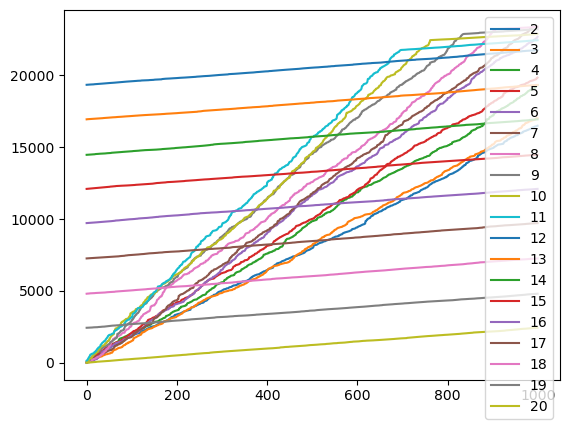

In [11]:
for N in range(2, largest_set+1):
    plt.plot(valid_seeds[str(N)], label=str(N))
    plt.legend()
    print("last seed for "+str(N) + ": " + str(valid_seeds[str(N)][-1]))

## Save and read

In [5]:
import json, os

filename = os.path.join("data", "qiskit_finance_seeds.npz")
np.savez(filename, **valid_seeds)


In [6]:
seeds = np.load(filename)

## Some examples

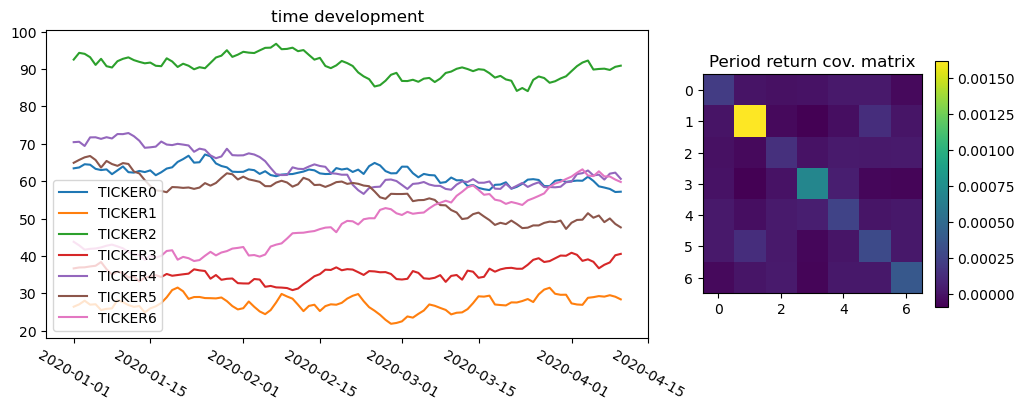

In [7]:
assets = asset_loader.AssetData(7, seed=seeds["7"][12])
assets.plotAssets()

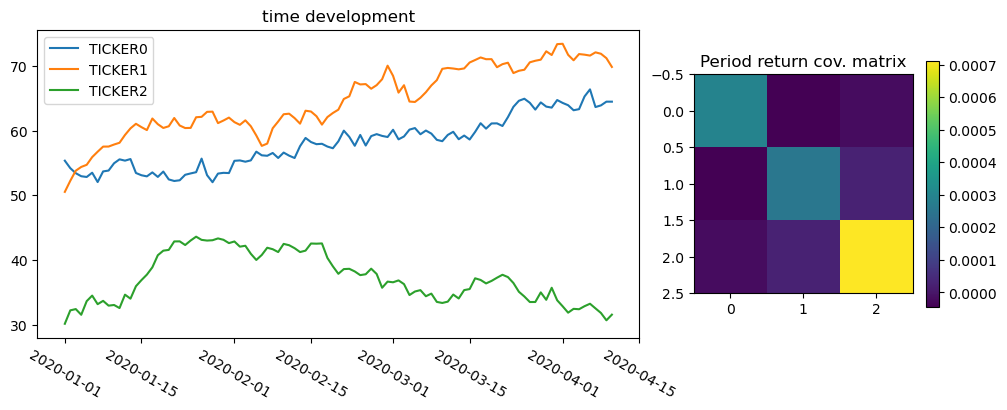

In [8]:
assets = asset_loader.AssetData(3, seed=seeds["3"][82])
assets.plotAssets()

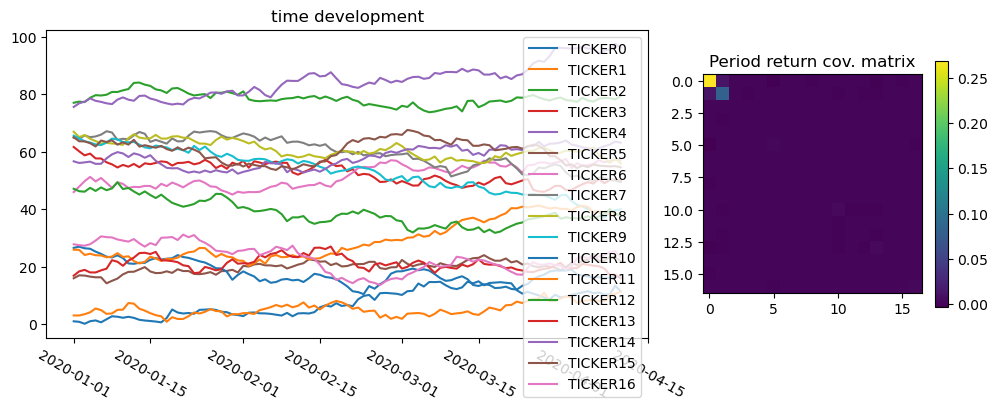

In [9]:
assets = asset_loader.AssetData(17, seed=seeds["17"][99])
assets.plotAssets()